## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('COVID19_line_list_data.csv')
df.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [4]:
df.shape

(1085, 27)

In [5]:
# Null values per column
df.isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64

In [6]:
#Dropping empty features
df.drop(['Unnamed: 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26'],1,inplace=True)
df.sample()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
661,662,5.0,1/27/2020,new confirmed COVID-19 patient in Taiwan: fema...,Taiwan,Taiwan,female,50.0,1/25/2020,1.0,1/25/2020,NaN,1/20/2020,1,0.0,0,0,"fever, muscle aches",Taiwan News,https://www.taiwannews.com.tw/en/news/3866006


In [7]:
df.tail(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...
1084,1085,1.0,2/25/2020,new COVID-19 patient confirmed in Switzerland:...,Bern,Switzerland,male,70.0,2/17/2020,NaN,NaN,2/15/2020,2/15/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/uk-switzerland...


So, the conclusions we will make will be based on data collected between 20 Jan 2020 to 25 Feb 2020

### What is the most affected age group?

In [29]:
max(df[df.gender=='male'].age)

89.0

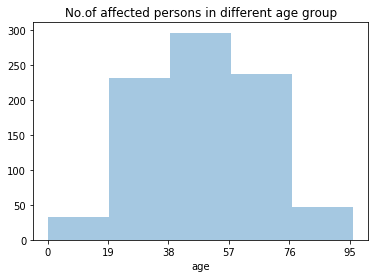

In [30]:
sns.distplot(df.age,bins=5,kde=False)
_=plt.title('No.of affected persons in different age group')
_=plt.xticks(list(range(0,int(max(df.age)),int(max(df.age)/5))),  list(range(0,int(max(df.age)),int(max(df.age)/5))))

So, the most affected age group is 40-60 and least is below 20 years old.

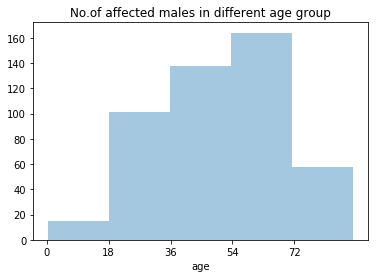

In [49]:
sns.distplot(df[df.gender=='male'].age,bins=5,kde=False)
_=plt.title('No.of affected males in different age group')
_=plt.xticks(list(range(0,int(max(df[df.gender=='male'].age)),int(max(df[df.gender=='male'].age)/5)+1)),
             list(range(0,int(max(df[df.gender=='male'].age)),int(max(df[df.gender=='male'].age)/5)+1)))

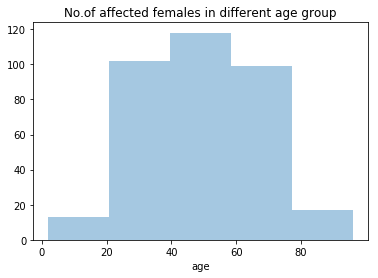

In [50]:
sns.distplot(df[df.gender=='female'].age,bins=5,kde=False)
_=plt.title('No.of affected females in different age group')
_=plt.xticks(list(range(0,int(max(df[df.gender=='female'].age)),int(max(df[df.gender=='female'].age)/5)+1)),
             list(range(0,int(max(df[df.gender=='female'].age)),int(max(df[df.gender=='female'].age)/5)+1)))

Among males, the most affected age group is around 50-70 and in female 40-60

## Which are most affected countries

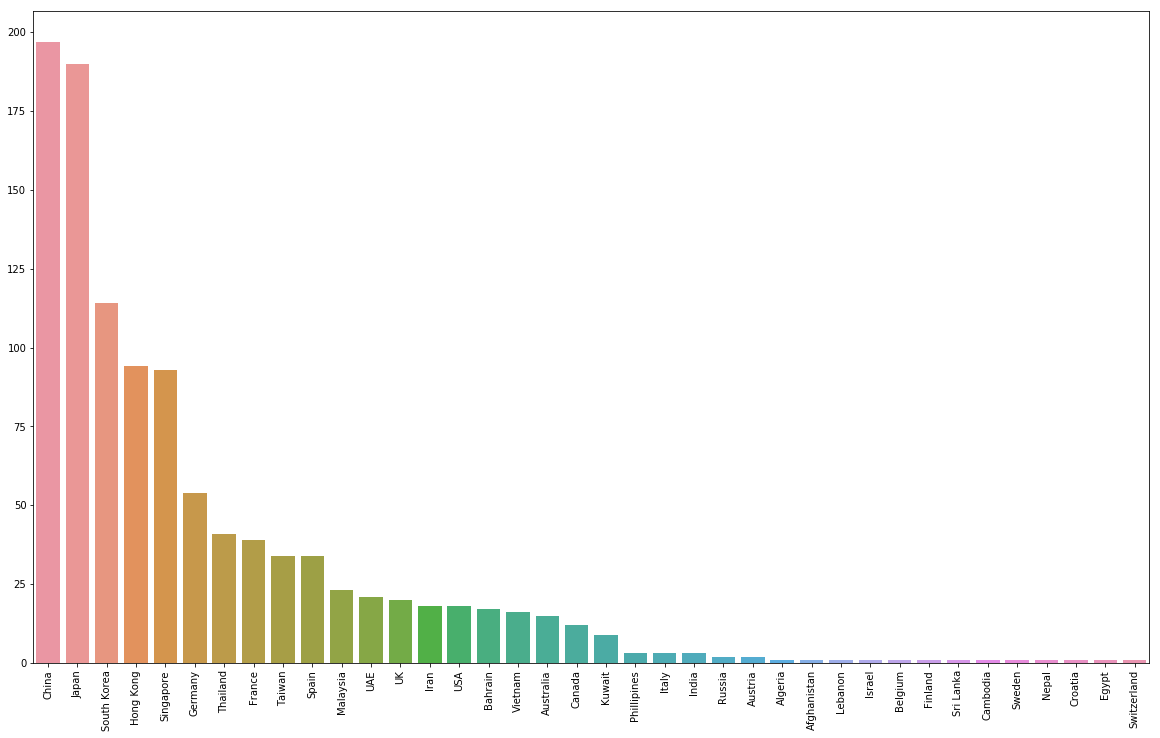

In [63]:
temp=df.country.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,12))
ax=sns.barplot(temp.index,temp.values)
_=ax.set_xticklabels(temp.index,rotation=90)

So, the most cases are reported from China, followed by Japan and South Korea.

## No. of deaths, recovered and ongoing cases

In [74]:
df[(df.death=='0') & (df.recovered=='0')].shape

(863, 20)

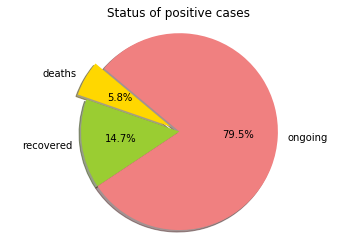

In [77]:
deaths=df[df.death!='0'].shape[0]
recovered=df[df.recovered!='0'].shape[0]
ongoing=df[(df.death=='0') & (df.recovered=='0')].shape[0]
labels = ['deaths','recovered','ongoing']
sizes = [deaths,recovered,ongoing]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Status of positive cases')
plt.axis('equal')
plt.show()